In [47]:
# Libaries

import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Yellowbirck
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv(r'uber-raw-data-may14.csv')

### Data description

In [3]:
data.shape

(652435, 4)

In [4]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [6]:

data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
#We are converting the time to date time type
data['Date/Time'] =pd.to_datetime(data['Date/Time'])

In [8]:
data['Base'].value_counts()

B02598    260549
B02682    222883
B02617    122734
B02512     36765
B02764      9504
Name: Base, dtype: int64

In [9]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [10]:
'''There is a possibility to encode Basebut since we will not use it for the model, we commented this part of code'''
# lbl_ebcode = LabelEncoder()
# data['Base'] =lbl_ebcode.fit_transform(data['Base'])

'There is a possibility to encode Basebut since we will not use it for the model, we commented this part of code'

In [11]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512


In [12]:
'''The data is very big so we decided to take 10% sample of data and do the models on that samle, as it was hard to executre the models in the rational time with all of the data'''
data_sample = data.sample(int(data.shape[0]*0.10))
data_sample.shape

(65243, 4)

In [13]:
data['Date/Time'].nunique()

43900

In [14]:
data_sample['Date/Time'].nunique()

29637

In [15]:
data['Date/Time'].nunique()/data.shape[0]

0.06728639634599615

In [16]:
# We will drop date/time column as it is not useful for the model 
data_model = data_sample.drop(columns=['Date/Time', 'Base'])

In [17]:
data_model.shape

(65243, 2)

## Elbow method to define number of clusters

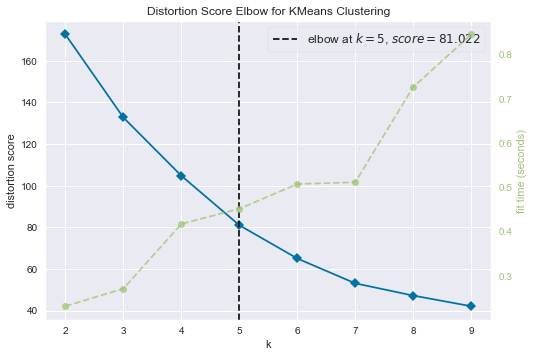

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
#We check number of clusters for KMeans model
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_model)
visualizer.poof()

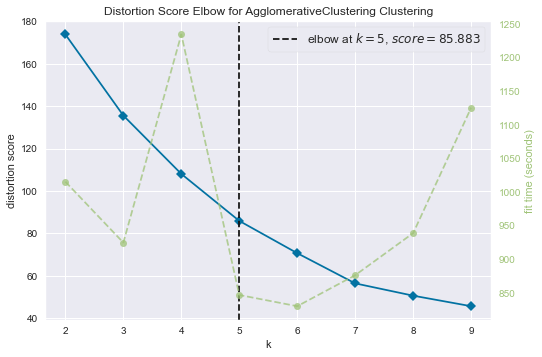

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
#We are checking the number fo clusters for Agglomerative Clustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_model)
visualizer.poof()

In [54]:
# Function to print the metrics for the unsupervised learning

def unsupervised_metrics(X, y_pred):
	'''This is a function that prints all of the metriics needed to decribe unsupervised learning model'''
	print("Silhouette Coefficient is equal to:")
	print(silhouette_score(X,y_pred))
	print("\nVariance Ratio Craterion is equal to:")
	print(calinski_harabasz_score(X, y_pred))
	print("\nDavides Bouldin score is equal to:")
	print(davies_bouldin_score(X, y_pred))
	


## Models

### KMeans

In [20]:
#Model
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(data_model)
y_kmeans = kmeans.predict(data_model)
y_kmeans


array([0, 1, 0, ..., 1, 1, 0])

In [21]:
#Adding labels to the data
data_sample['labels_kmeans'] = kmeans.labels_

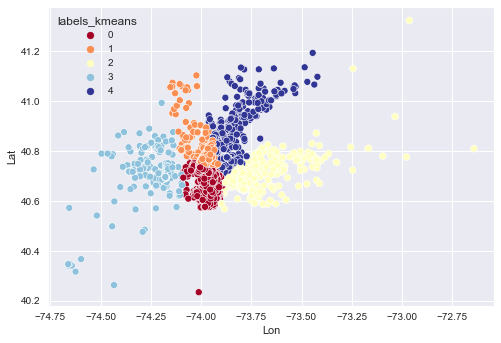

In [82]:
#Plotting clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='labels_kmeans', palette='RdYlBu')
plt.show()

In [51]:
#Model evaluation
result_kmeans =unsupervised_metrics(data_model, y_pred=y_kmeans)


Silhouette Coefficient is equal to:
0.4303334962146584

Variance Ratio Craterion is equal to:
39927.76147663474

Davides Bouldin score is equal to:
0.676886622840404


In [23]:
centers = kmeans.cluster_centers_

In [24]:
centers

array([[ 40.71920497, -73.99143337],
       [ 40.76369743, -73.97575341],
       [ 40.66174401, -73.76915722],
       [ 40.69582604, -74.19978767],
       [ 40.79280521, -73.87230248]])

### Aglomerative Clustering

In [25]:
# Model

cluster_ag = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ag = cluster_ag.fit_predict(data_model)

In [50]:
#model evaluation
unsupervised_metrics(data_model, y_pred=y_ag)

Silhouette Coefficient is equal to:
0.42916073213137523

Variance Ratio Craterion is equal to:
36744.300095126586

Davides Bouldin score is equal to:
0.6799022583895529


In [27]:
#labeling data
data_sample['ag_labels'] =cluster_ag.labels_

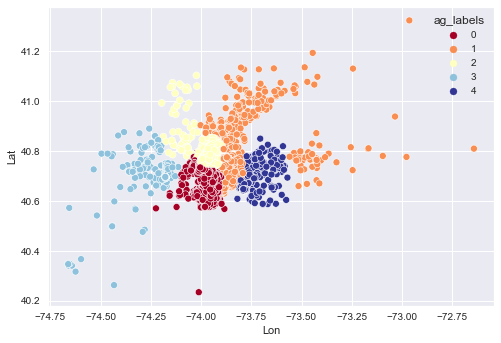

In [83]:
#Plotting clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='ag_labels', palette='RdYlBu')
plt.show()

### MeanShift

In [28]:
#Model
mean_shift = MeanShift(n_jobs=-1).fit(data_model)


In [29]:
# Labeling data
data_sample['mean_shift_label'] =mean_shift.labels_

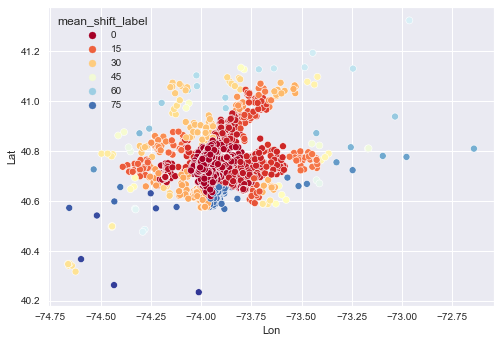

In [88]:
#plotting clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='mean_shift_label', palette='RdYlBu')
plt.show()

In [89]:
#Model evaluation
unsupervised_metrics(X=data_model, y_pred=data_sample["mean_shift_label"])


Silhouette Coefficient is equal to:
0.5004486452111722

Variance Ratio Craterion is equal to:
2319.9372192718924

Davides Bouldin score is equal to:
0.5012511841106271


In [90]:
# Number of clusters
data_sample['mean_shift_label'].nunique()

84

In [91]:
#Looking at clusters
data_sample['mean_shift_label'].value_counts()

0     59025
1      2626
2      1451
3       528
24      313
      ...  
66        1
81        1
68        1
55        1
60        1
Name: mean_shift_label, Length: 84, dtype: int64

In [95]:
#Now we want to look at the 5 most populated clusters
cluster_num = [0,1,2,3,24]
data_5cluster_mean= data_sample.loc[data_sample['mean_shift_label'].isin(cluster_num)]

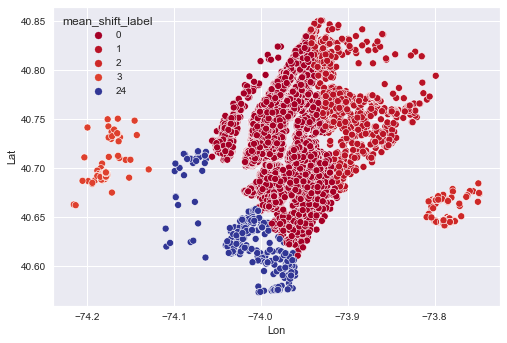

In [96]:
#Plotting top 5 most populated clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_5cluster_mean, x='Lon', y='Lat', hue='mean_shift_label', palette='RdYlBu')
plt.show()

### OPTICS

In [38]:
#Model
optics = OPTICS(n_jobs=-1).fit(data_model)

C:\tools\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [39]:
#Labeling the data
data_sample['optic_labels'] =optics.labels_

In [85]:
#Model evaluation
unsupervised_metrics(X=data_model, y_pred=data_sample['optic_labels'])

Silhouette Coefficient is equal to:
-0.047741133448819945

Variance Ratio Craterion is equal to:
20.564874534477553

Davides Bouldin score is equal to:
1.74942336018235


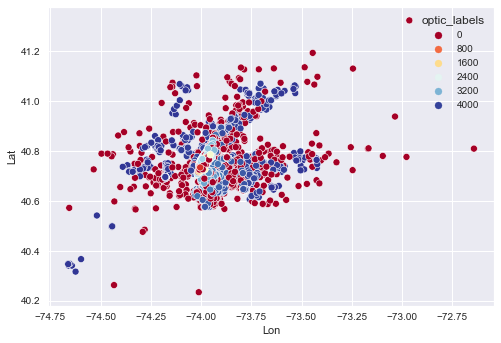

In [86]:
#Plotting clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='optic_labels', palette='RdYlBu')
plt.show()

In [87]:
# Number of clusters
data_sample['optic_labels'].nunique()

4094

In [97]:
#Looking at clusters
data_sample['optic_labels'].value_counts()

-1       28221
 3924       61
 45         60
 279        52
 38         49
         ...  
 2532        5
 3335        5
 311         5
 992         5
 2855        5
Name: optic_labels, Length: 4094, dtype: int64

In [98]:
#Now we want to look at the 5 most populated clusters
cluster_num = [-1,3924,45,279,38]
data_5cluster_optic= data_sample.loc[data_sample['optic_labels'].isin(cluster_num)]

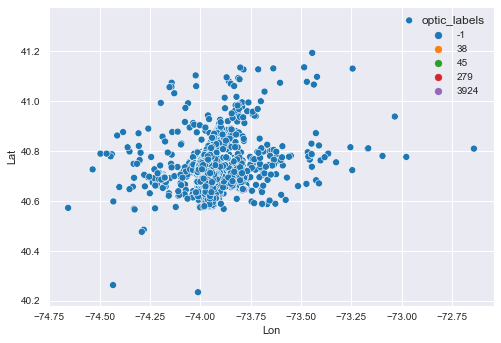

In [103]:
#Plotting top 5 most populated clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_5cluster_optic, x='Lon', y='Lat', hue='optic_labels', palette='tab10' )
plt.show()

## DBSCAN


In [72]:
#Model
dbscan = DBSCAN(eps=0.009, min_samples=20,n_jobs=-1)
dbscan.fit(data_model)
y_dbscan = dbscan.fit_predict(data_model)
y_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
#Model evaluation
unsupervised_metrics(X=data_model, y_pred=y_dbscan)

Silhouette Coefficient is equal to:
0.2173191296205692

Variance Ratio Craterion is equal to:
4126.136715890596

Davides Bouldin score is equal to:
2.052352236659717


In [74]:
#Labeling data
data_sample['dbscan_label'] =dbscan.labels_

In [75]:
#Number of clusters
data_sample['dbscan_label'].nunique()

11

In [80]:
#Changing parameters of the model to see if we can decrease number of clusters
dbscan2 = DBSCAN(eps=0.015, min_samples=25,n_jobs=-1)
dbscan2.fit(data_model)
y_dbscan2 = dbscan.fit_predict(data_model)
y_dbscan2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
data_sample['dbscan_label2'] =dbscan.labels_
data_sample['dbscan_label2'].nunique()

11

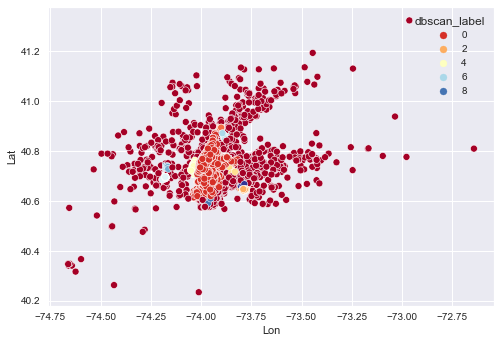

In [119]:
#Plotting clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_sample, x='Lon', y='Lat', hue='dbscan_label', palette='RdYlBu')
plt.show()

In [120]:
data_sample['dbscan_label'].value_counts()

 0    61354
 2     1398
-1     1222
 5      482
 4      413
 3      105
 1       78
 8       66
 6       54
 9       43
 7       28
Name: dbscan_label, dtype: int64

In [124]:
#Now we want to look at the 5 most populated clusters without noise (claster -1)
cluster_num = [3,0,2,5,4]
data_5cluster_dbscan= data_sample.loc[data_sample['dbscan_label'].isin(cluster_num)]

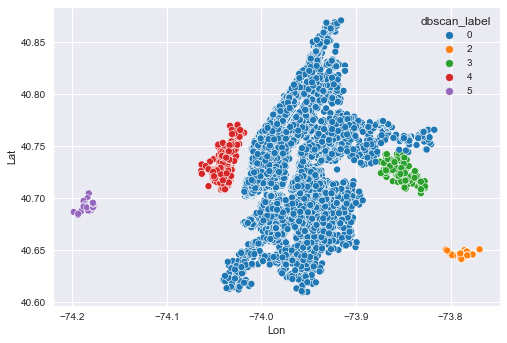

In [125]:
#Plotting top 5 most populated clusters
sns.set_style('darkgrid')
sns.scatterplot(data=data_5cluster_dbscan, x='Lon', y='Lat', hue='dbscan_label', palette='tab10' )
plt.show()

## RESULTS

In [106]:
results =pd.DataFrame({
    'k_means' : [5, 0.4303334962146584, 39927.76147663474, 0.676886622840404],
    'Agglomerative_clusstering' : [5, 0.42916073213137523, 36744.300095126586,0.6799022583895529],
    'DBSCAN' : [11, 0.2173191296205692, 4126.136715890596, 2.052352236659717],
    'optics' : [4094, -0.047741133448819945, 20.564874534477553,1.74942336018235],
    'means_shift' : [84, 0.5004486452111722, 2319.9372192718924,0.5012511841106271]
}, 
)

In [111]:
results = results.T
results.columns = ['n_clusters','Silhouette Coefficient', 'Variance Ratio Criterion','Davides Bouldin score']

In [112]:
results

,n_clusters,Silhouette Coefficient,Variance Ratio Criterion,Davides Bouldin score
k_means,5.0,0.430333,39927.761477,0.676887
Agglomerative_clusstering,5.0,0.429161,36744.300095,0.679902
DBSCAN,11.0,0.217319,4126.136716,2.052352
optics,4094.0,-0.047741,20.564875,1.749423
means_shift,84.0,0.500449,2319.937219,0.501251


In [113]:
data_sample.head()

,Date/Time,Lat,Lon,Base,labels_kmeans,ag_labels,mean_shift_label,optic_labels,dbscan_label,dbscan_label2
524304,2014-05-14 23:52:00,40.7243,-73.9933,B02682,0,0,0,-1,0,0
229928,2014-05-23 08:01:00,40.7650,-73.9613,B02598,1,2,0,-1,0,0
593137,2014-05-23 18:41:00,40.7210,-74.0100,B02682,0,0,0,1564,0,0
436216,2014-05-02 21:55:00,40.7191,-73.9897,B02682,0,0,0,-1,0,0
578604,2014-05-21 22:18:00,40.7461,-74.0053,B02682,0,0,0,2218,0,0


## Saving results

In [116]:
results.to_csv('results.csv')
data_sample.to_csv('data_sample_labeled.csv')